In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
churn=pd.read_csv('customer_churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

Build the logistic regression model.

Evaluate the model.


In [9]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churn.dtypes.describe

<bound method NDFrame.describe of customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object>

In [12]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
#dropping columns

churn_new = churn[['SeniorCitizen','MonthlyCharges','tenure','Churn']]
display(churn_new.shape)
churn_new

(7043, 4)

,SeniorCitizen,MonthlyCharges,tenure,Churn
0,0,29.85,1,No
1,0,56.95,34,No
2,0,53.85,2,Yes
3,0,42.30,45,No
4,0,70.70,2,Yes
...,...,...,...,...
7038,0,84.80,24,No
7039,0,103.20,72,No
7040,0,29.60,11,No
7041,1,74.40,4,Yes


In [36]:
churn_new.isna().values.any()

False

In [50]:
churn_new.nunique()

SeniorCitizen        2
MonthlyCharges    1585
tenure              73
Churn                2
dtype: int64

# Assumptions of Logistic Reg

In [38]:
# X/y split
X = churn_new.drop('Churn',axis = 1)
y = churn_new['Churn']

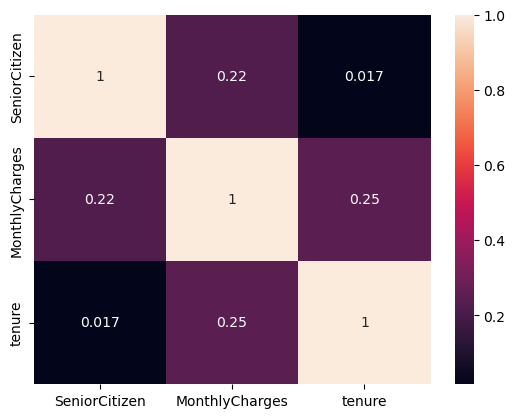

In [39]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Standardization of independent variables

In [40]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [66]:
# all features are numeric, so no need to split into _num and _cat

import numpy as np
from sklearn.preprocessing import MinMaxScaler

transformer=MinMaxScaler().fit(X_train)
X_train_norm=pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_norm=pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_test_norm.head()

,SeniorCitizen,MonthlyCharges,tenure
0,0.0,0.397908,0.263889
1,0.0,0.979582,0.833333
2,0.0,0.534861,0.180556
3,0.0,0.021912,0.013889
4,0.0,0.592629,0.763889


In [67]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 



In [68]:
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

# start logistic regression model

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(X_train_norm, y_train)


In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,solver='lbfgs')
model.fit(X_train_norm,y_train)

LogisticRegression(random_state=0)

In [71]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [72]:
LR.score(X_test_norm,y_test)

73% accuracy via the Logistic regression model

0.7370812038614424

# Imbalance and metrics

In [76]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

predictions=model.predict(X_test_norm)


In [77]:
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
y_test

0       No
1       No
2       No
3       No
4       No
        ..
1756    No
1757    No
1758    No
1759    No
1760    No
Name: Churn, Length: 1761, dtype: object

In [79]:
precision=precision_score(y_test,predictions,pos_label='Yes')
recall=recall_score(y_test,predictions,pos_label='Yes')
f1=f1_score(y_test,predictions,pos_label='Yes')
display(precision)
display(recall)
display(f1)

0.6176470588235294

0.4535637149028078

0.5230386052303861

In [ ]:
# recall score is at 45%
#lets try oversampling and under-sampling the data to see if we get better results

In [80]:
confusion_matrix(y_test,predictions)

array([[1168,  130],
       [ 253,  210]])

In [ ]:
# predicted | A | B | 
# --------------------------
# actual  A | + |  |
# --------------------------
#         B |   | + | 
# --------------------------
# we were able to predict correctly for 1168+210 customers but 253+130 customers are still not being predicted

In [81]:
y_train.value_counts()


No     3876
Yes    1406
Name: Churn, dtype: int64

In [ ]:
#there is an imbalance in our data. We have only 1406 yes values compared to 3876 no values

# Over-sample & under-sampling our data

In [94]:
from sklearn.utils import resample

train=pd.concat([X_train_norm,y_train],axis=1)
train.head()

,SeniorCitizen,MonthlyCharges,tenure,Churn
0,0.0,0.309263,0.333333,No
1,1.0,0.468127,0.750000,No
2,0.0,0.218127,0.041667,Yes
3,0.0,0.019920,0.847222,No
4,0.0,0.659363,0.166667,Yes


In [95]:
no_churn=train[train['Churn']=='No']
yes_churn=train[train['Churn']=='Yes']

In [96]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [97]:
# oversample minority
yes_churn_oversampled=resample(yes_churn,replace=True,
                             n_samples=len(no_churn),
                             random_state=0)

In [98]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [99]:
train_oversampled=pd.concat([no_churn,yes_churn_oversampled],axis=0)

In [100]:
y_train_over=train_oversampled['Churn']
X_train_over=train_oversampled.drop('Churn',axis=1)

In [101]:
model_over=LogisticRegression(random_state=0, solver='lbfgs')
model_over.fit(X_train_over, y_train_over)
pred_over=model_over.predict(X_test_norm)

In [103]:
print('Values for over-sampling:')
display(precision_score(y_test,pred_over,pos_label='Yes'))
display(recall_score(y_test,pred_over,pos_label='Yes'))
display(f1_score(y_test,pred_over,pos_label='Yes'))

Values for over-sampling:


0.4790764790764791

0.7170626349892009

0.57439446366782

In [104]:
confusion_matrix(y_test,pred_over)

array([[937, 361],
       [131, 332]])

In [ ]:
# comparing to the logistic regression model predictions with over-sampling predictions
                           #LR                   #Over-Sampling 
#Precision score     0.6176470588235294         0.4790764790764791        
#Recall Score        0.4535637149028078         0.7170626349892009
#f1 Score            0.5230386052303861         0.57439446366782

#significant improvement in the recall score but accuracy went down

In [105]:
# comparing to the logistic regression model predictions with over-sampling predictions - confusion matrix
           #LR                        #Over-Sampling
#array([[1168,  130],               array([[937, 361],
#      [ 253,  210]])              #.     [131, 332]])

# from 130+253=383 false predictions to 131+361=492 false predictions - this did not work here!

# Under-Sampling

In [106]:
no_churn_undersampled=resample(no_churn, replace=True,
                              n_samples=len(yes_churn),
                               random_state=0)

In [107]:
no_churn_undersampled.shape

(1406, 4)

In [108]:
train_undersampled=pd.concat([yes_churn,no_churn_undersampled],axis=0)

In [109]:
y_train_under=train_undersampled['Churn']
X_train_under=train_undersampled.drop('Churn',axis=1)

In [110]:
model_under=LogisticRegression(random_state=0, solver='lbfgs')
model_under.fit(X_train_under, y_train_under)
pred_under=model_under.predict(X_test_norm)

In [111]:
print('Values for under-sampling:')
display(precision_score(y_test,pred_under,pos_label='Yes'))
display(recall_score(y_test,pred_under,pos_label='Yes'))
display(f1_score(y_test,pred_under,pos_label='Yes'))

Values for under-sampling:


0.47895500725689405

0.712742980561555

0.5729166666666666

In [112]:
confusion_matrix(y_test,pred_under)

array([[939, 359],
       [133, 330]])

In [113]:
# comparing to the logistic regression model predictions with over-sampling predictions & Under-sampling predictions
                           #LR                   #Over-Sampling                #Under-Sampling 
#Precision score     0.6176470588235294         0.4790764790764791             0.47895500725689405      
#Recall Score        0.4535637149028078         0.7170626349892009             0.712742980561555
#f1 Score            0.5230386052303861         0.57439446366782               0.5729166666666666

#significant improvement with over-sampling vs LR in the recall score but accuracy went down
#No significant difference between over-sampling & Under-Sampling

In [120]:
# comparing to the logistic regression model predictions with over-sampling & under-sampling predictions - confusion matrix
           #LR                        #Over-Sampling                    #Under-Sampling 
#array([[1168,  130],               array([[937, 361],                  array([[939, 359],
#      [ 253,  210]])              #.     [131, 332]])                  #     [133, 330]])

# from 130+253=383 false predictions to 131+361=492 false predictions - this did not work here!
# Not much difference between over-sampling & Under-Sampling values

# SMOTE

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [117]:
X_train_SMOTE.shape

(7752, 3)

In [118]:
model_smote= LogisticRegression(random_state=0, solver='lbfgs')
model_smote.fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = model_smote.predict(X_test_norm)

print("precision: ",precision_score(y_test,pred_smote,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred_smote,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred_smote,pos_label='Yes'))

precision:  0.47982708933717577
recall:  0.7192224622030238
f1:  0.5756266205704408


In [119]:
confusion_matrix(y_test,pred_smote)

array([[937, 361],
       [130, 333]])

In [121]:
# comparing to the logistic regression model predictions with over-sampling predictions & Under-sampling predictions & SMOTE
                           #LR                   #Over-Sampling                #Under-Sampling                #SMOTE
#Precision score     0.6176470588235294         0.4790764790764791             0.47895500725689405     0.47982708933717577 
#Recall Score        0.4535637149028078         0.7170626349892009             0.712742980561555       0.7192224622030238
#f1 Score            0.5230386052303861         0.57439446366782               0.5729166666666666      0.5756266205704408

#significant improvement with over-sampling vs LR in the recall score but accuracy went down
#No significant difference between over-sampling & Under-Sampling
# Honestly there is no significant difference between the over-sampling, Under-sampling and SMOTE values

In [122]:
# comparing to the logistic regression model predictions with over-sampling & under-sampling predictions & SMOTE- confusion matrix
           #LR                        #Over-Sampling                    #Under-Sampling         #SMOTE
#array([[1168,  130],               array([[937, 361],                  array([[939, 359],     array([[937, 361],
#      [ 253,  210]])              #.     [131, 332]])                  #     [133, 330]])    #     [130, 333]])

# from 130+253=383 false predictions to 131+361=492 false predictions - this did not work here!
# Not much difference between over-sampling & Under-Sampling values
# SMOTE also did not further changes the values much after over-sampling & under-sampling

In [ ]:
# Final thoughts: It was definetely worth trying over-sampling & under-sampling the data to increase the recall scores compared to only relying on the LR model predictions. 